Bibliotecas 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from matplotlib import style

In [18]:
style.use('bmh')

Buscando dados 

In [8]:
tickers = ['TOTS3.SA', '^BVSP']
dados = pd.DataFrame()

for ticker in tickers:
    dados[ticker] = yf.download(ticker, start='2019-01-01')['Adj Close']

dados.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TOTS3.SA,^BVSP
Date,,
2019-01-02,9.337692,91012.0
2019-01-03,9.552803,91564.0
2019-01-04,9.816800,91841.0
2019-01-07,9.604949,91699.0
2019-01-08,9.213841,92032.0


Calculando retorno simples

In [10]:
retorno_simples = dados.pct_change()
retorno_simples.head()

,TOTS3.SA,^BVSP
Date,,
2019-01-02,NaN,NaN
2019-01-03,0.023037,0.006065
2019-01-04,0.027636,0.003025
2019-01-07,-0.021580,-0.001546
2019-01-08,-0.040719,0.003631


Calculando retorno acumulado e normalizando a base de dados

In [13]:
retorno_acumulado = (1 + retorno_simples).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado.head()

,TOTS3.SA,^BVSP
Date,,
2019-01-02,1.000000,1.000000
2019-01-03,1.023037,1.006065
2019-01-04,1.051309,1.009109
2019-01-07,1.028621,1.007548
2019-01-08,0.986736,1.011207


Plotando o gráfico

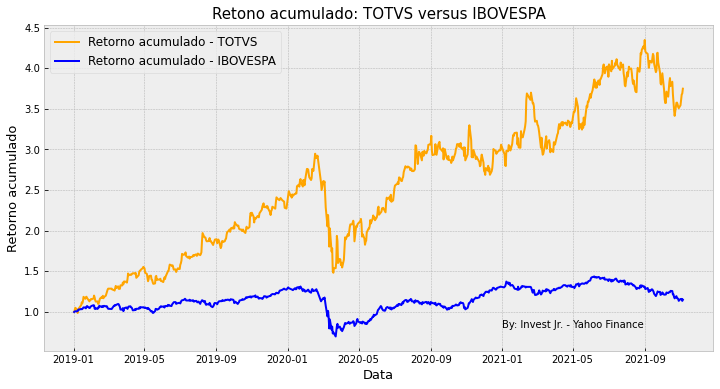

In [23]:
plt.figure(figsize=(12, 6));
plt.title('Retono acumulado: TOTVS versus IBOVESPA', fontsize=15);
x, = plt.plot(retorno_acumulado['TOTS3.SA'], color='orange');
y, = plt.plot(retorno_acumulado['^BVSP'], color='blue');
plt.xlabel('Data', fontsize=13);
plt.ylabel('Retorno acumulado', fontsize=13);
plt.text(np.Datetime64('2021-01-01'), 0.8, 'By: Invest Jr. - Yahoo Finance', fontsize=10);
plt.legend([x, y], ['Retorno acumulado - TOTVS', 'Retorno acumulado - IBOVESPA'], loc=2, fontsize=12);

Correlação média dos retornos acumulados das variáveis 

In [36]:
corr = retorno_acumulado.corr()
corr

,TOTS3.SA,^BVSP
TOTS3.SA,1.000000,0.709359
^BVSP,0.709359,1.000000


Criando mapa de calor

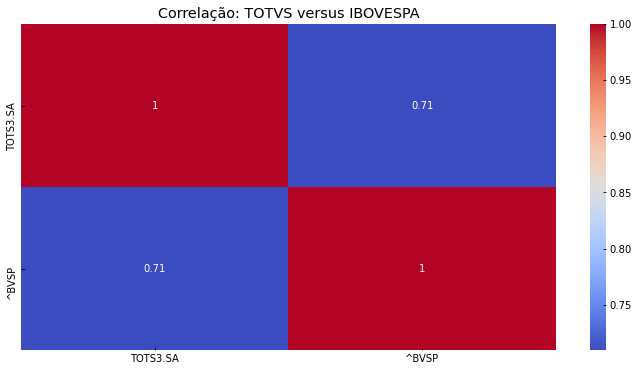

In [44]:
plt.figure(figsize=(12, 6));
sns.heatmap(corr, annot=True, cmap='coolwarm');
plt.title('Correlação: TOTVS versus IBOVESPA');

SCRIP FINALIZADO!